In [47]:
import requests
import json
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
from datetime import timedelta

In [3]:
# 1.M  Indicates the utility
# 99.M  Indicates All Sectors
#cow = coal
#ng = natural gas
#wnd = wind
#sun = solar
#hyc = hydro electric conventional 
#nuc = nuclear
#bio = biomass

#IL - Illinois
#OH - Ohio
#CA - California
#AL - Alabama
#NY - New York
#AZ - Arizona
#WA - Washington
#MA - Massachusetts 
#FL - Florida
#TX - Texas

In [4]:
states = ["IL", "OH", "CA", "AL", "NY", "AZ", "WA", "MA", "FL", "TX"]

fuels = ["COW", "NG", "WND", "SUN", "HYC", "NUC", "GEO"]
df1 = pd.DataFrame()

for state in states:
    for fuel in fuels:
        try:
            df = pd.DataFrame()
            responses = []
            dates = []
            data = []
            query_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=ELEC.GEN."+ fuel + "-"+ state + "-99.M"
            responses.append(requests.get(query_url).json())
            
            for i in range(len(responses[0]['series'][0]["data"])):
                dates.append(responses[0]['series'][0]["data"][i][0])
                data.append(responses[0]['series'][0]["data"][i][1])
                
            df[str(state) + " Date " + str(fuel)] = dates
            df[str(state) + " Data " + str(fuel)] = data
            df1 = df1.join(df, how="outer")
            
        except:
            df[str(state) + " Date " + str(fuel)] = 0
            df[str(state) + " Data " + str(fuel)] = 0
            df1 = df1.join(df, how="outer")
            


In [5]:
df1 = df1.fillna(0)
for state in states:
    for fuel in fuels:
        df1[str(state) + " Date " + str(fuel)] = df1["IL Date COW"]
df1

IL Date COW  IL Data COW IL Date NG  IL Data NG IL Date WND  IL Data WND  \
0        201805   4564.75389     201805  1344.57367      201805    898.01182   
1        201804   3679.11488     201804  1164.79127      201804   1124.60186   
2        201803   5091.05175     201803   994.37265      201803   1237.48065   
3        201802   4827.99740     201802   523.83688      201802   1191.04585   
4        201801   5882.72633     201801  1325.73441      201801   1372.39630   
5        201712   5134.88754     201712  1079.63297      201712   1125.30959   
6        201711   5067.57655     201711   824.86167      201711   1107.49070   
7        201710   4452.44507     201710  1316.50986      201710   1125.47676   
8        201709   4845.91972     201709  1316.33037      201709    603.02808   
9        201708   5120.65371     201708  1264.82721      201708    481.38897   
10       201707   5849.74275     201707  1828.03952      201707    607.52959   
11       201706   5002.85598     201706  1414.63045      201706    909.87804   
12       201705   4034.15999     201705   947.39282      201705    984.16766   
13       201704   4180.68276     201704   784.52018      201704   1180.58720   
14       201703   4638.66951     201703  1412.93775      201703   1183.58111   
15       201702   4069.46166     201702   947.72579      201702   1070.52928   
16       201701   5788.79019     201701   933.86556      201701    918.18148   
17       201612   5904.01066     201612  1051.28663      201612   1204.58302   
18       201611   3283.53450     201611  1043.93696      201611   1095.38612   
19       201610   4636.72745     201610  1414.79048      201610    960.32004   
20       201609   5586.07186     201609  1501.75293      201609    692.75369   
21       201608   6390.40898     201608  2245.84490      201608    331.34664   
22       201607   6413.29224     201607  2543.97539      201607    399.59083   
23       201606   5962.07513     201606  1564.46157      201606    591.12374   
24       201605   3657.31518     201605  1116.57904      201605    854.20527   
25       201604   4127.38223     201604  1171.05288      201604   1025.91381   
26       201603   3541.82856     201603  1557.32386      201603   1095.56568   
27       201602   4114.10587     201602  1156.45444      201602   1144.23155   
28       201601   5721.04923     201601  1117.23213      201601   1268.41362   
29       201512   4492.12699     201512  1100.30344      201512   1315.72902   
..          ...          ...        ...         ...         ...          ...   
179      200306   7036.95300     200306   299.85300      200306      1.45000   
180      200305   5914.92200     200305   188.27400      200305      1.36700   
181      200304   5976.90500     200304   213.90400      200304      1.34000   
182      200303   6595.75900     200303   252.45400      200303      1.49200   
183      200302   7296.28900     200302   331.50700      200302      1.45000   
184      200301   8426.09500     200301   325.41000      200301      1.64300   
185      200212   7265.86900     200212   189.92000      200212      0.00000   
186      200211   6752.77100     200211   160.79400      200211      0.00000   
187      200210   7292.34000     200210   278.39000      200210      0.00000   
188      200209   7861.93800     200209   825.06900      200209      0.00000   
189      200208   8543.78400     200208  1709.55300      200208      0.00000   
190      200207   8549.61400     200207  2408.69900      200207      0.00000   
191      200206   7546.85700     200206  1060.58800      200206      0.00000   
192      200205   6562.41300     200205   406.48200      200205      0.00000   
193      200204   6232.13200     200204   826.78600      200204      0.00000   
194      200203   6839.50100     200203   545.15800      200203      0.00000   
195      200202   6349.91900     200202   376.50300      200202      0.00000   
196      200201   6888.20800     200201   290.79500      200201      0.00000   
197 

In [53]:
df1.to_csv("generationoutput.csv")
df1 = df1.sort_values(by=["IL Date COW"])
dates = df1["IL Date COW"].values.tolist()
x_dates = np.arange(0, len(dates),1)
x_dates

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

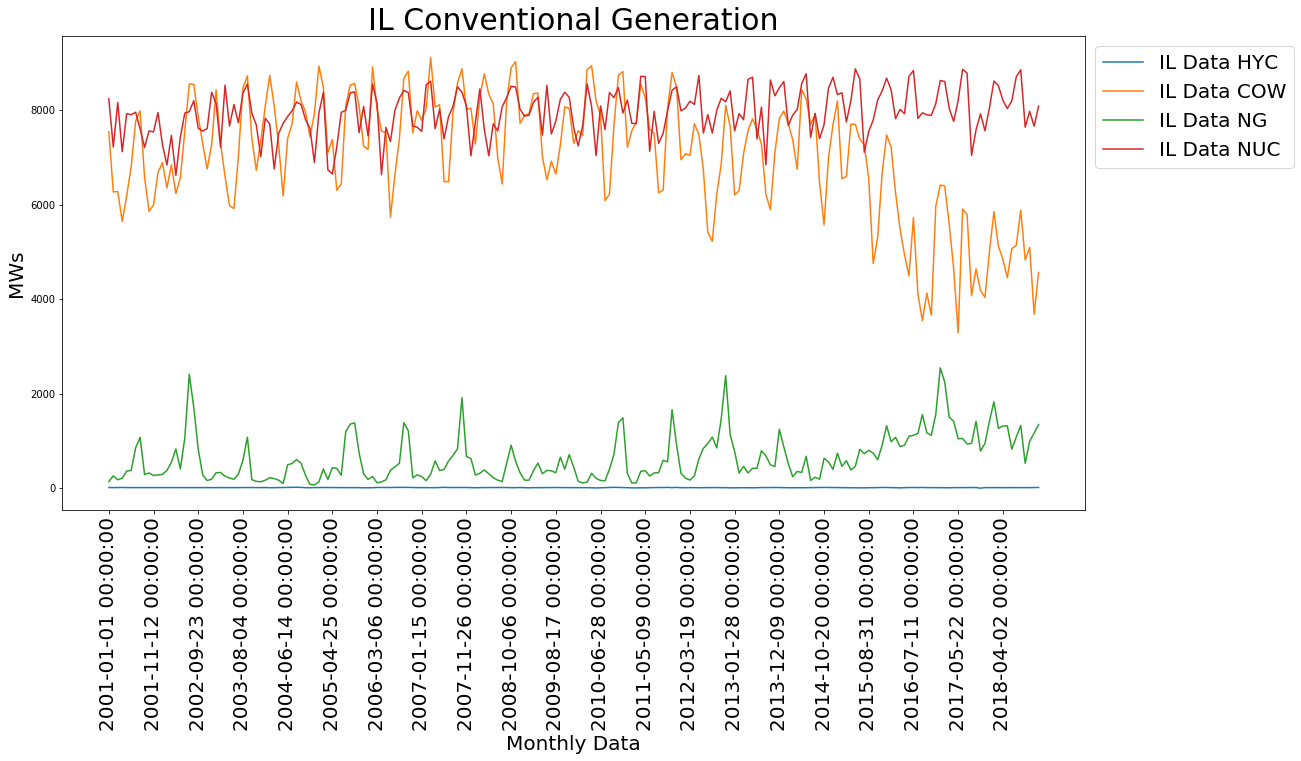

['HYC', 'COW', 'NG', 'NUC']


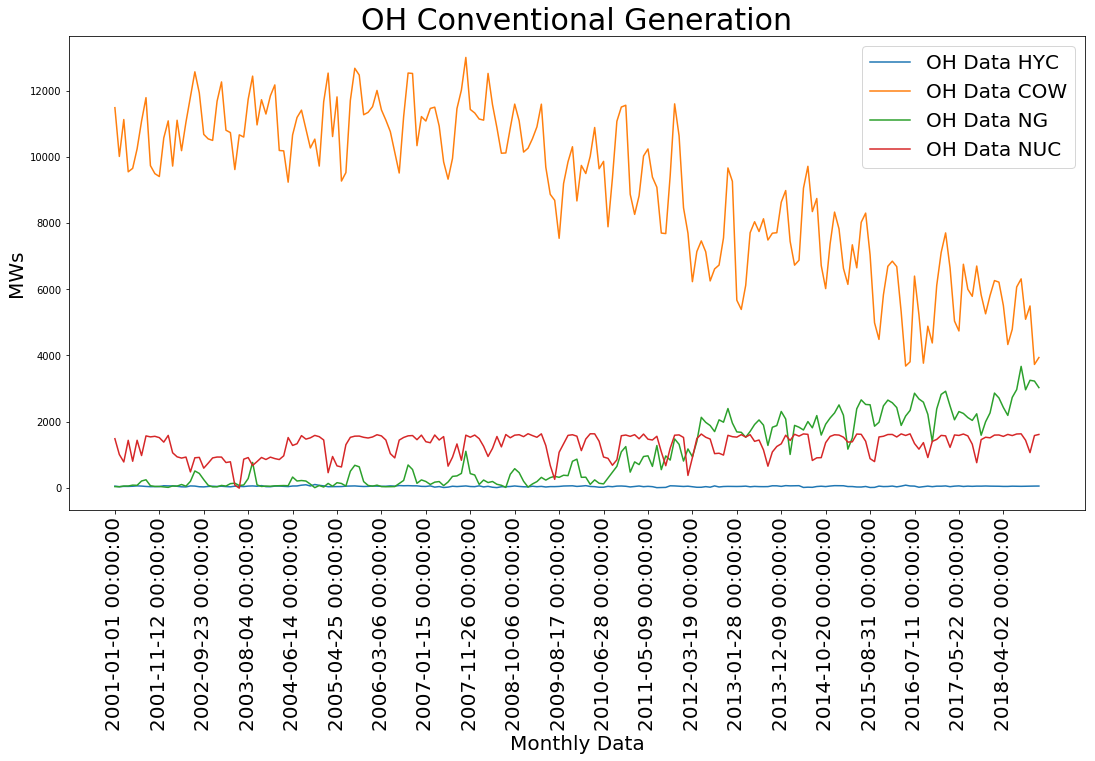

['HYC', 'COW', 'NG', 'NUC']


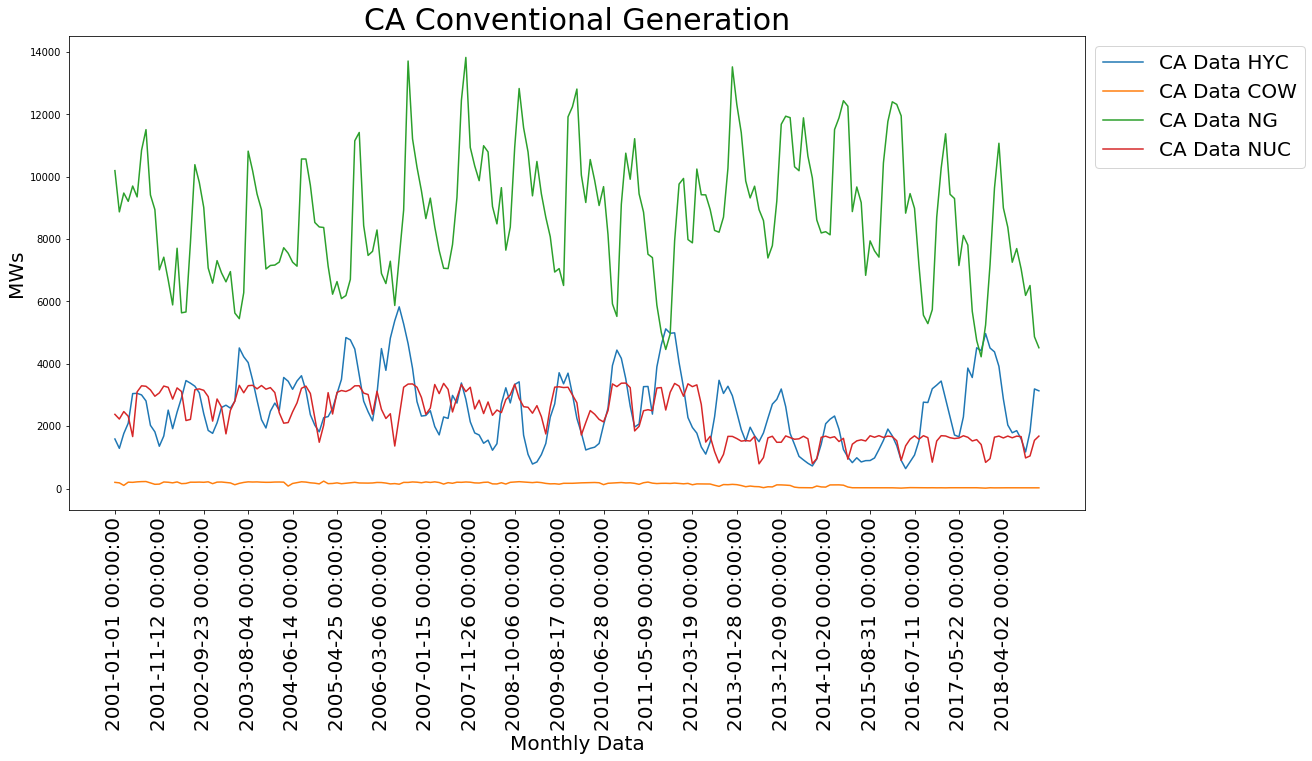

['HYC', 'COW', 'NG', 'NUC']


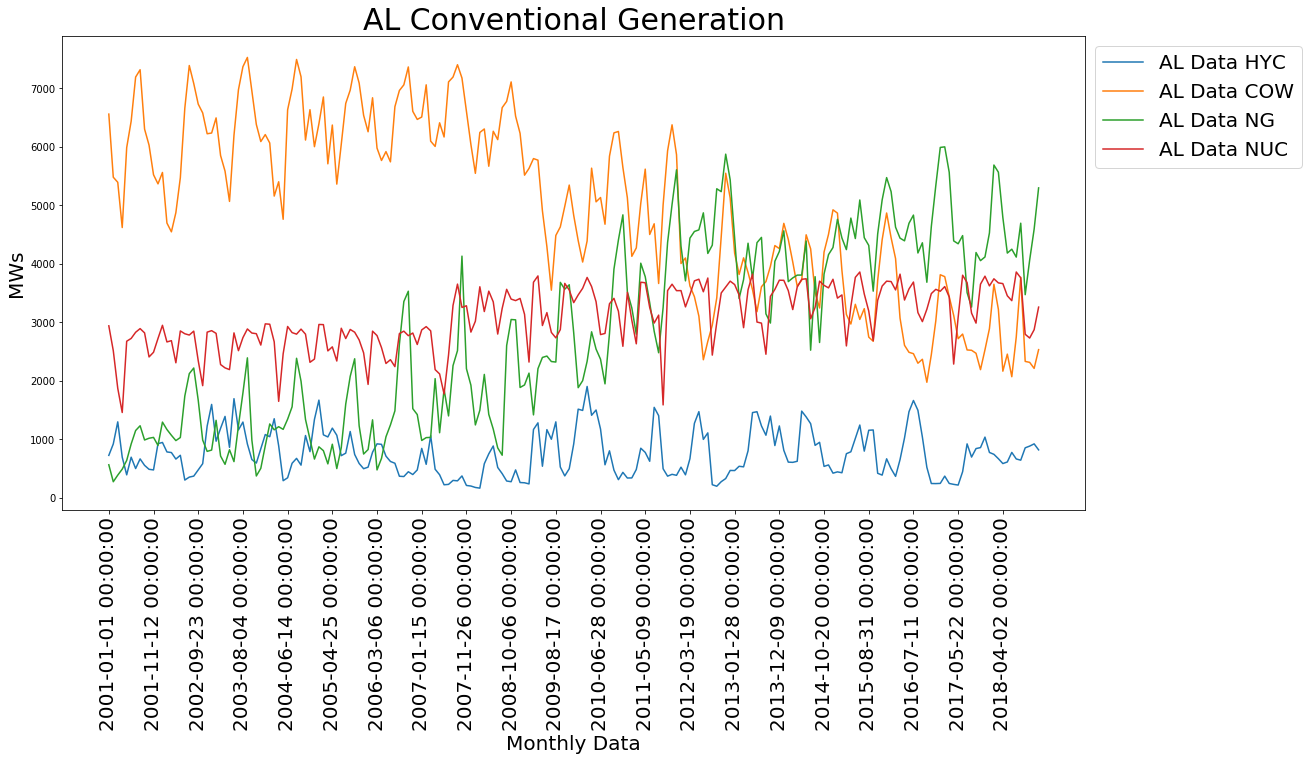

['HYC', 'COW', 'NG', 'NUC']


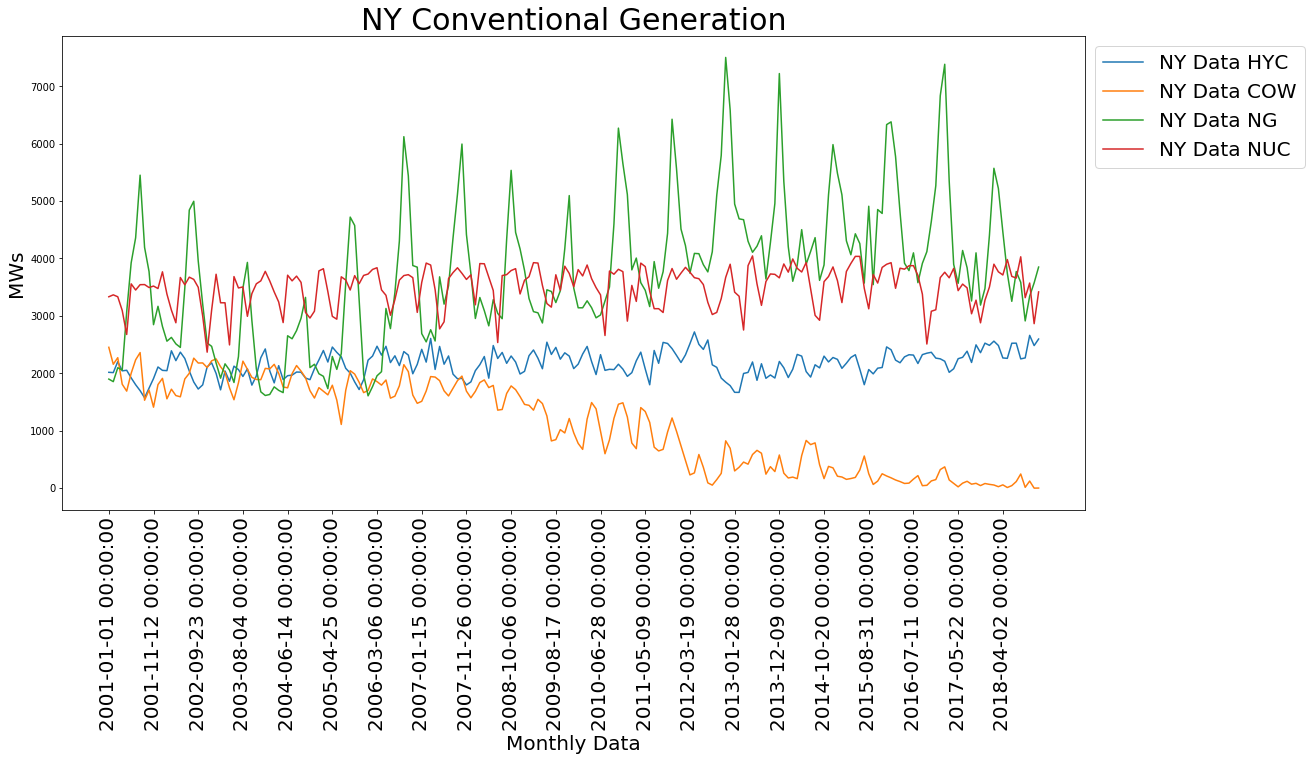

['HYC', 'COW', 'NG', 'NUC']


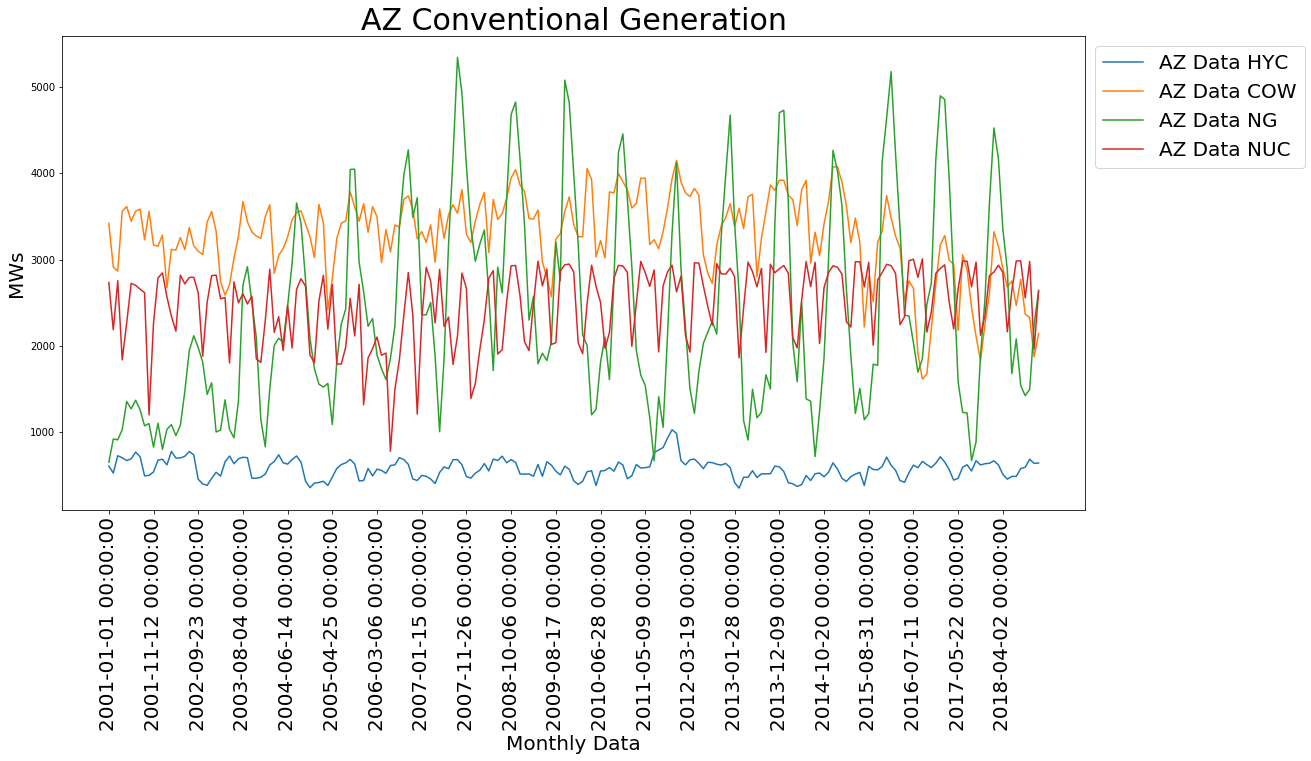

['HYC', 'COW', 'NG', 'NUC']


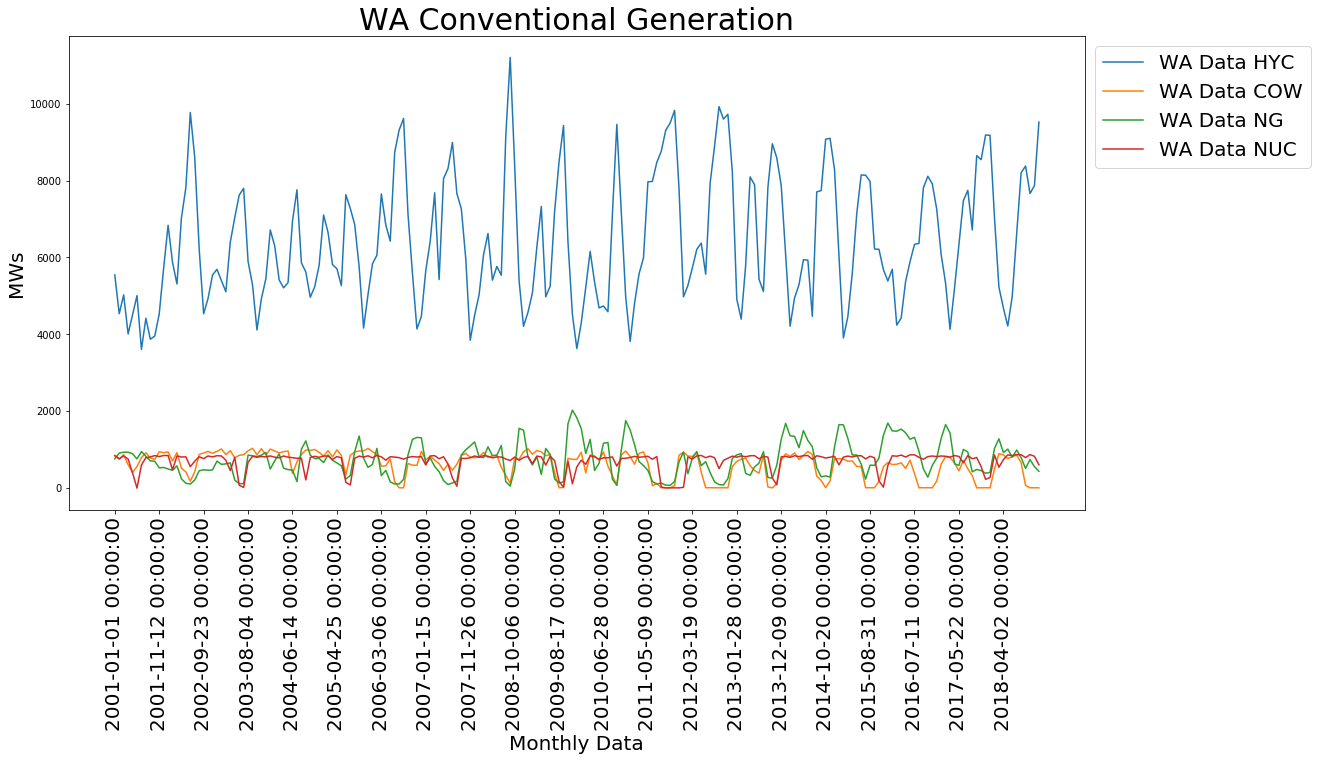

['HYC', 'COW', 'NG', 'NUC']


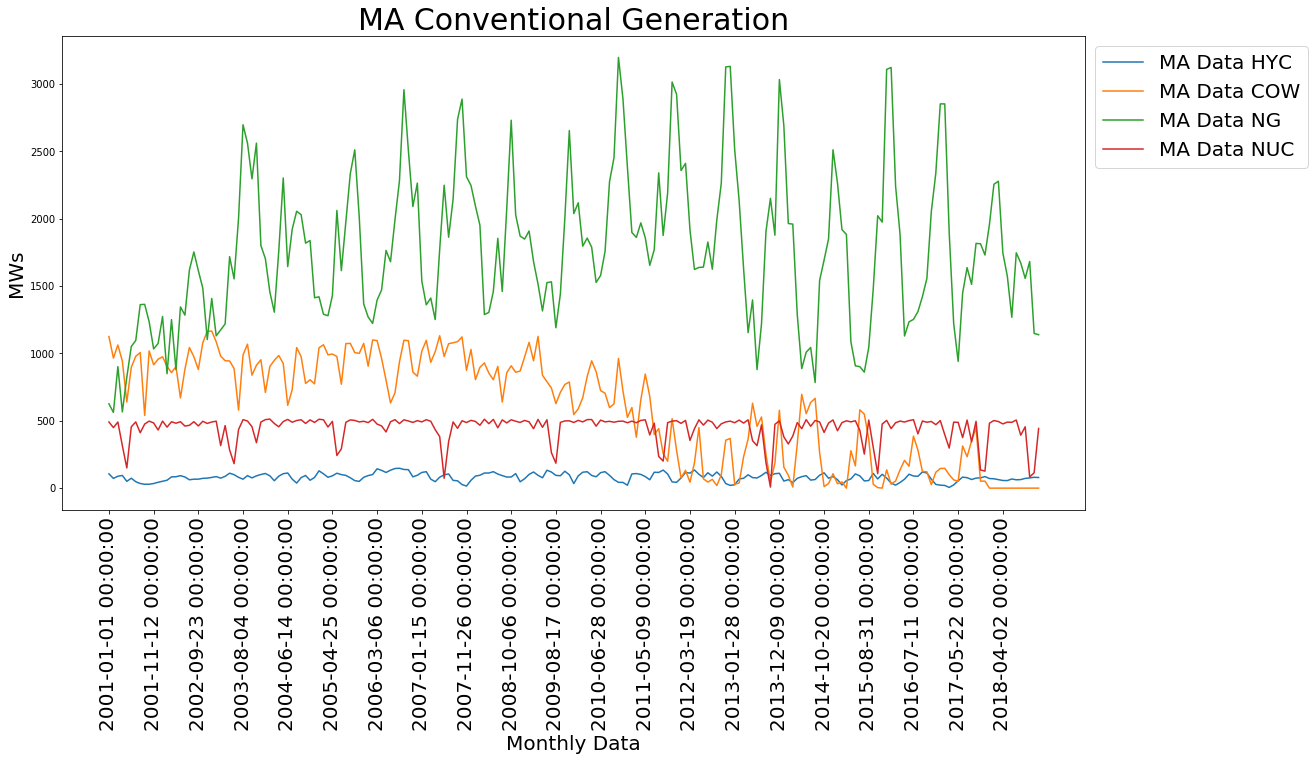

['HYC', 'COW', 'NG', 'NUC']


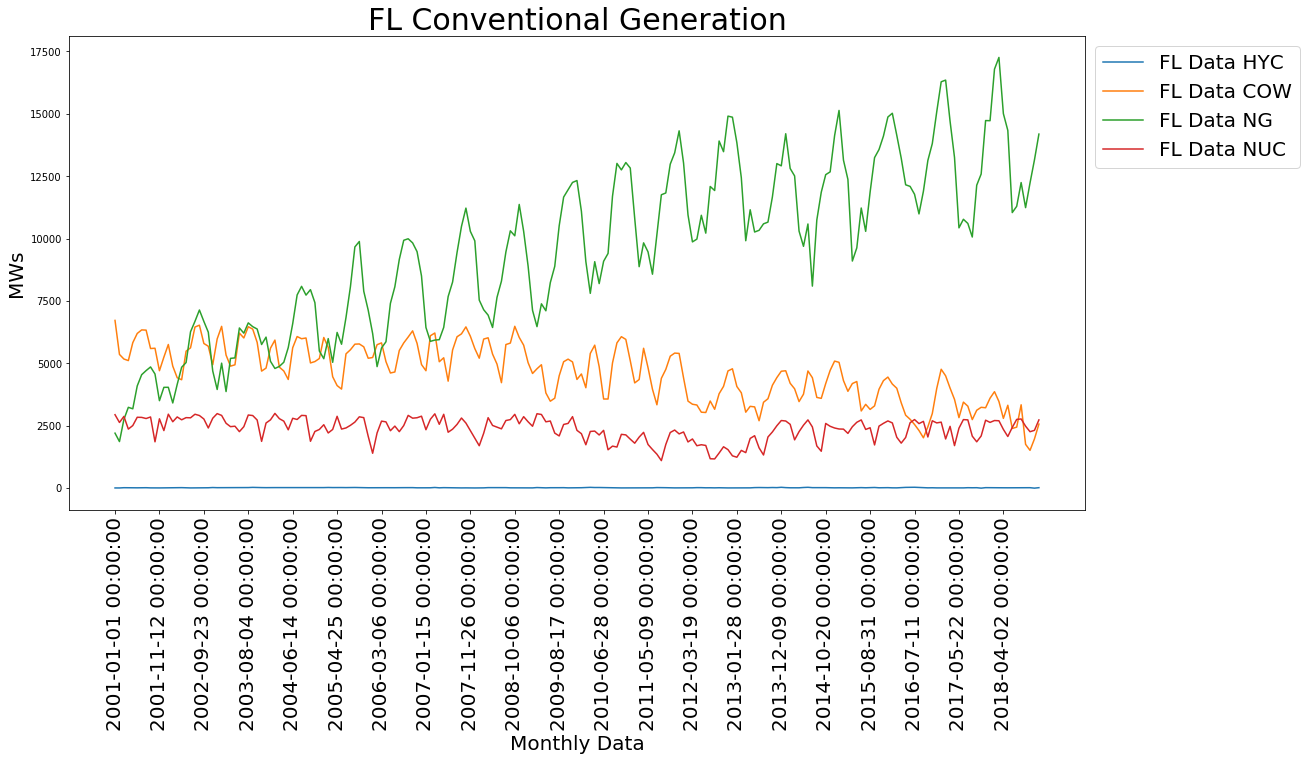

['HYC', 'COW', 'NG', 'NUC']


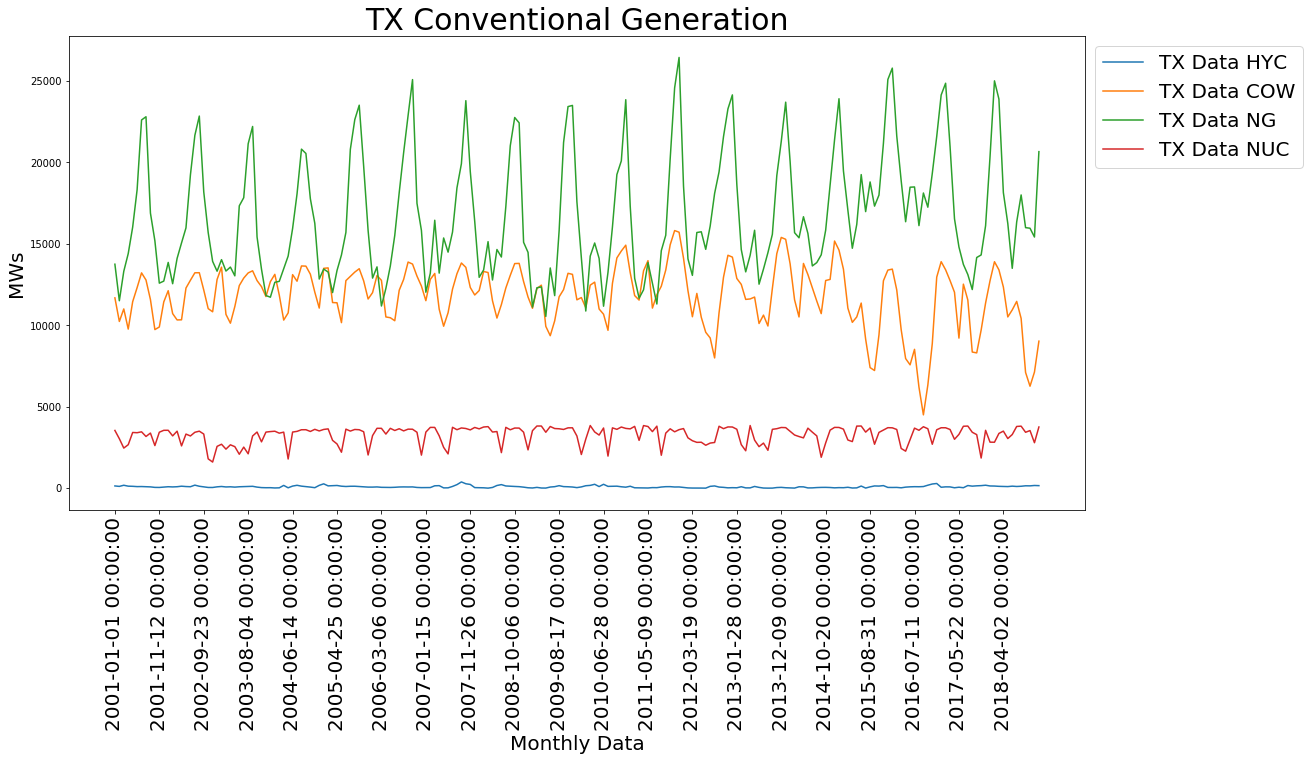

['HYC', 'COW', 'NG', 'NUC']


In [125]:
fuels = ["HYC", "COW", "NG", "NUC"]

for state in states:
    plt.figure(figsize=(15,10))
    for fuel in fuels:
        plt.plot(x_dates,df1[str(state) + " Data " + str(fuel)])
    plt.xticks(np.arange(0,208,10), np.arange(date(2001,1,1), date(2018,5,1), timedelta(weeks=45)).astype(date), rotation=90, fontsize=20)
    plt.tight_layout()
    plt.legend(bbox_to_anchor =(1,1),fontsize=20)
    plt.title(str(state) + " Conventional Generation", fontsize=30)
    plt.ylabel("MWs", fontsize=20)
    plt.xlabel("Monthly Data", fontsize=20)
    
    
    plt.savefig(str(state) + "conventionalgeneration.png", dpi=200, bbox_inches='tight', fontsize=20)
    plt.show()
    print(fuels)

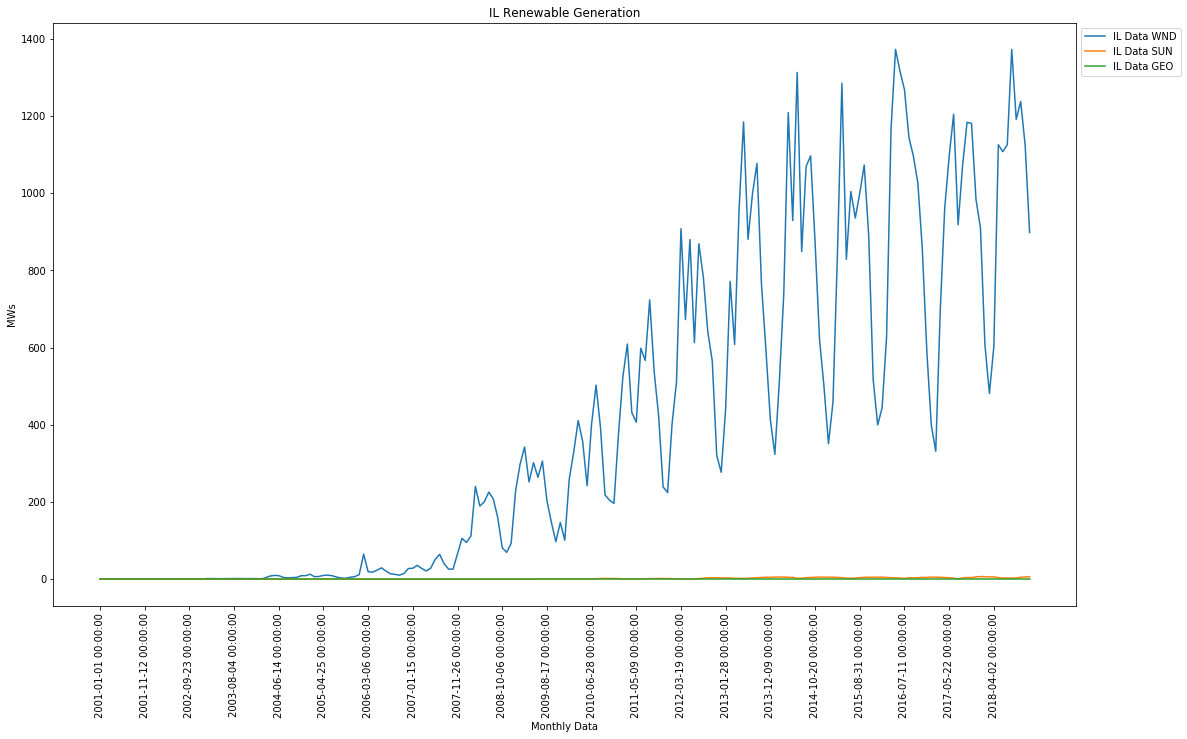

['WND', 'SUN', 'GEO']


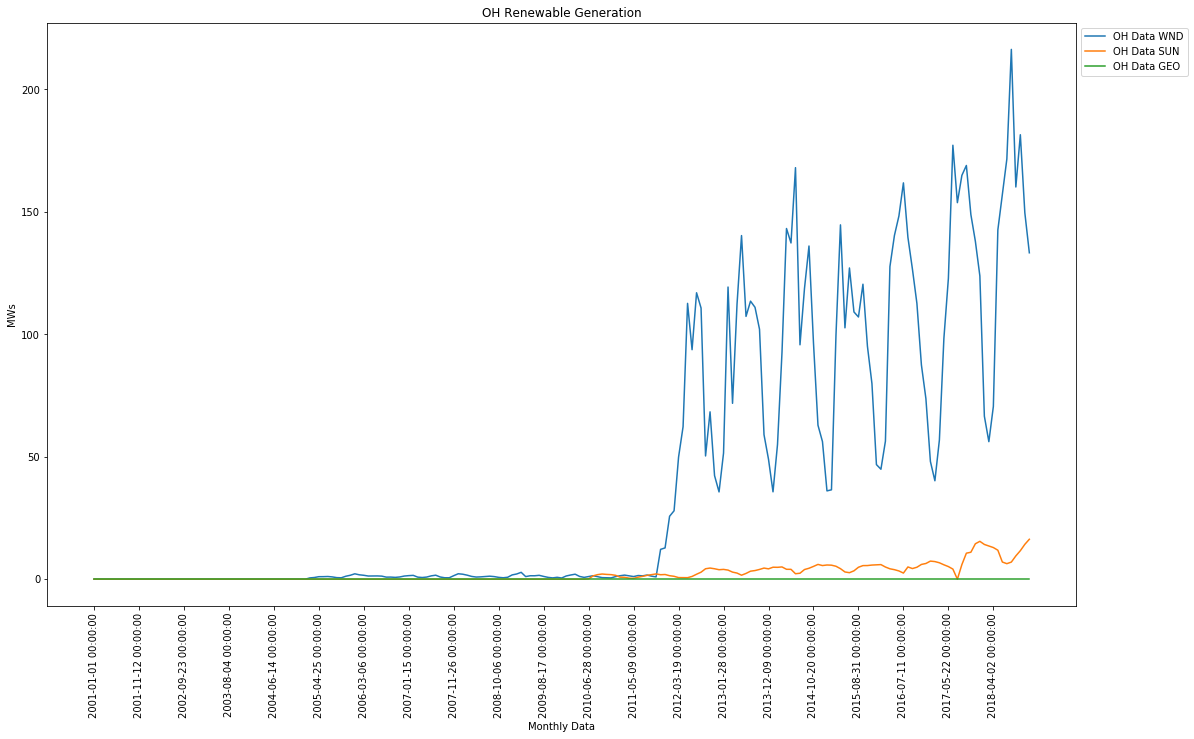

['WND', 'SUN', 'GEO']


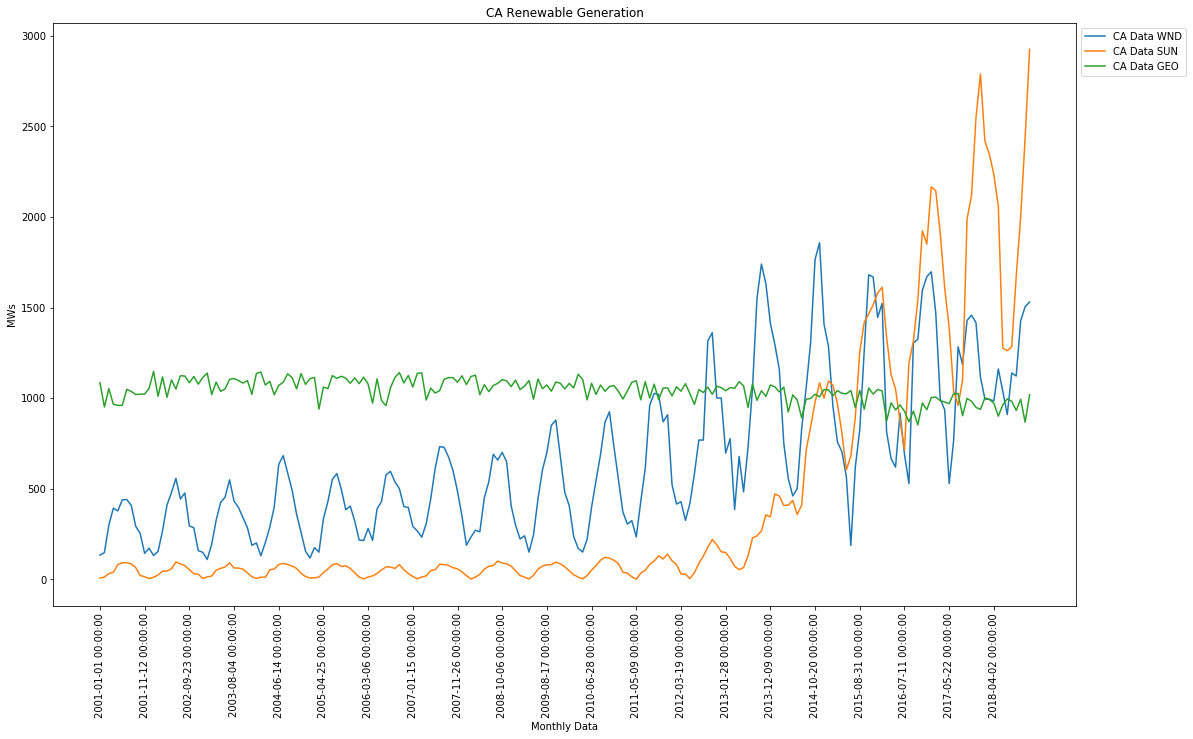

['WND', 'SUN', 'GEO']


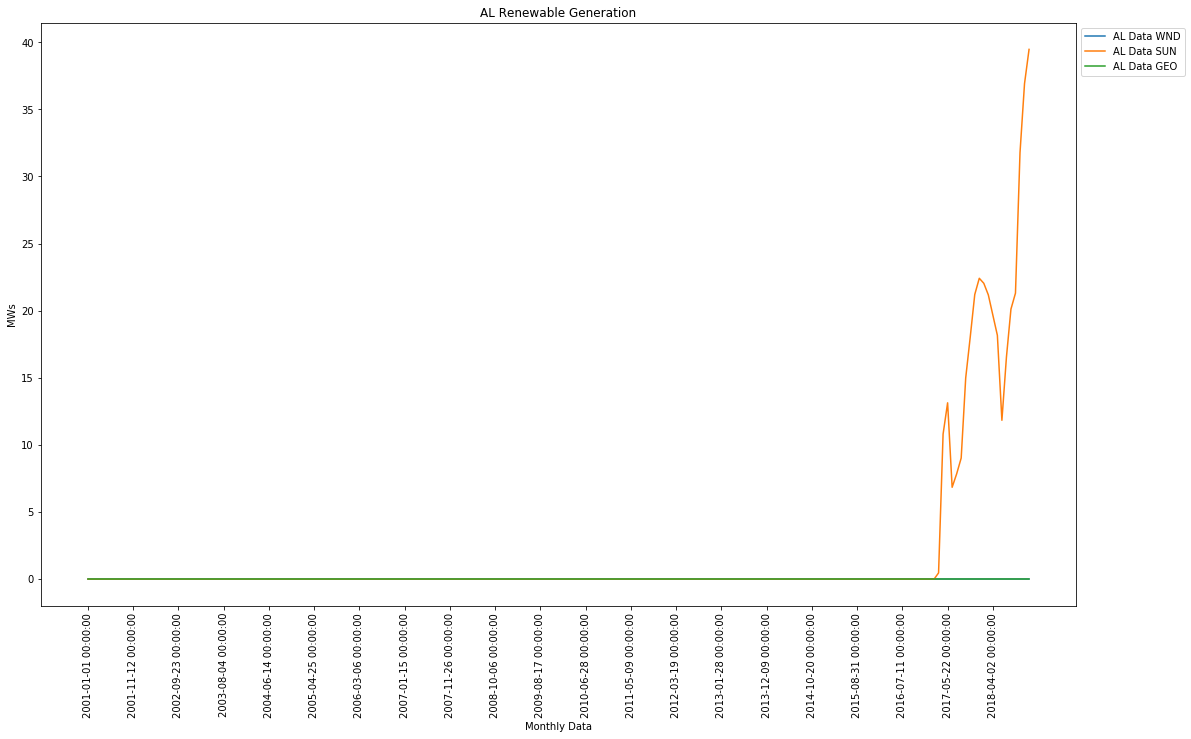

['WND', 'SUN', 'GEO']


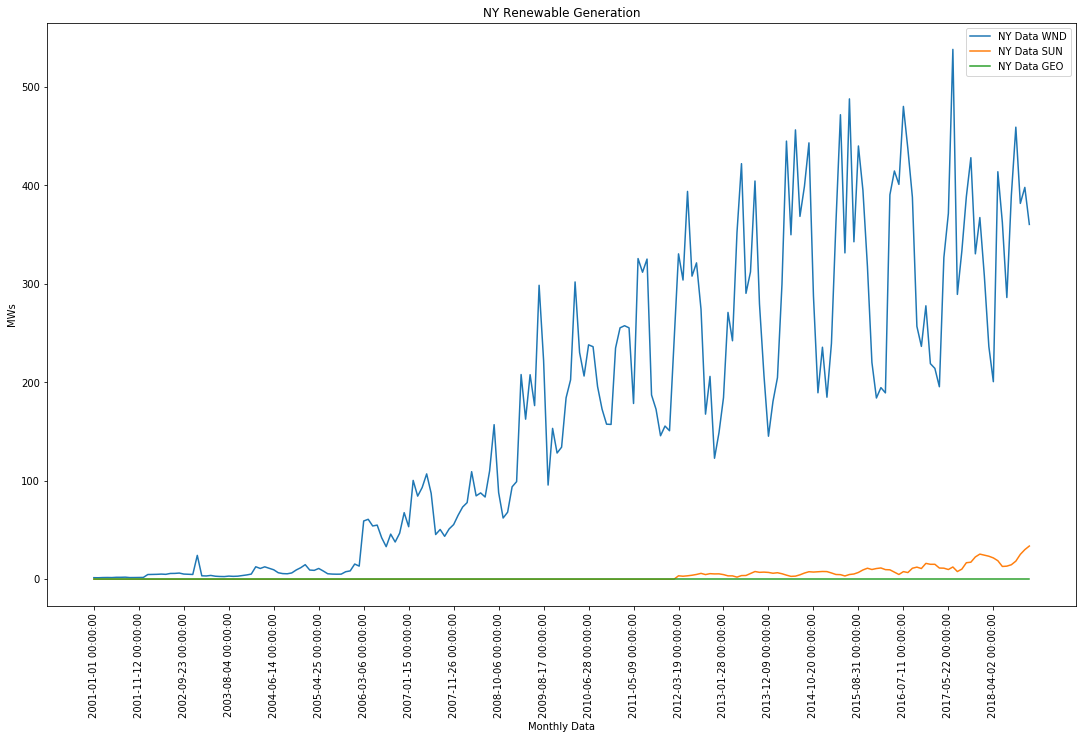

['WND', 'SUN', 'GEO']


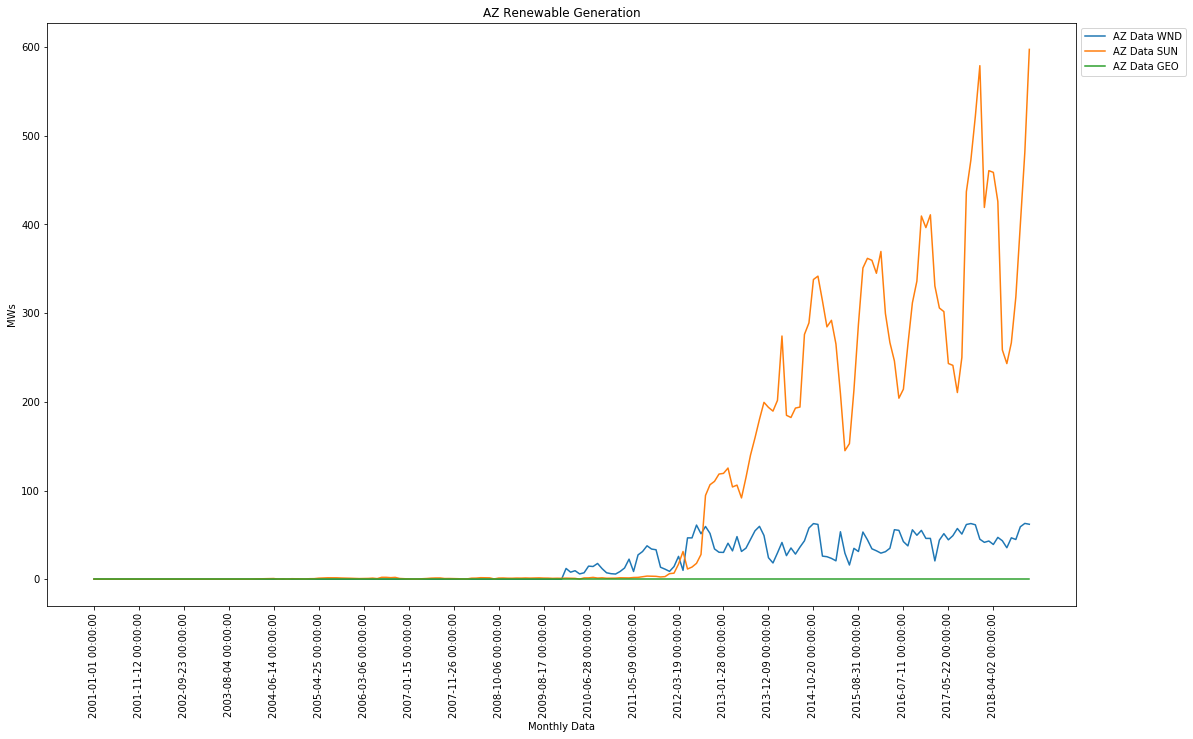

['WND', 'SUN', 'GEO']


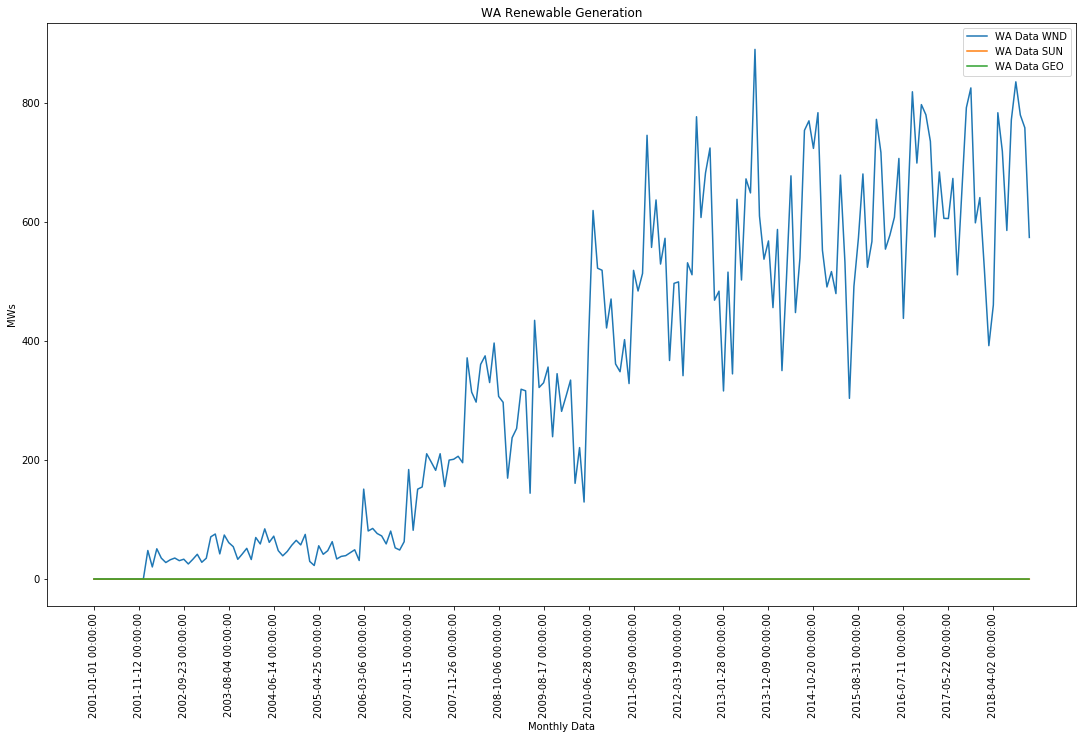

['WND', 'SUN', 'GEO']


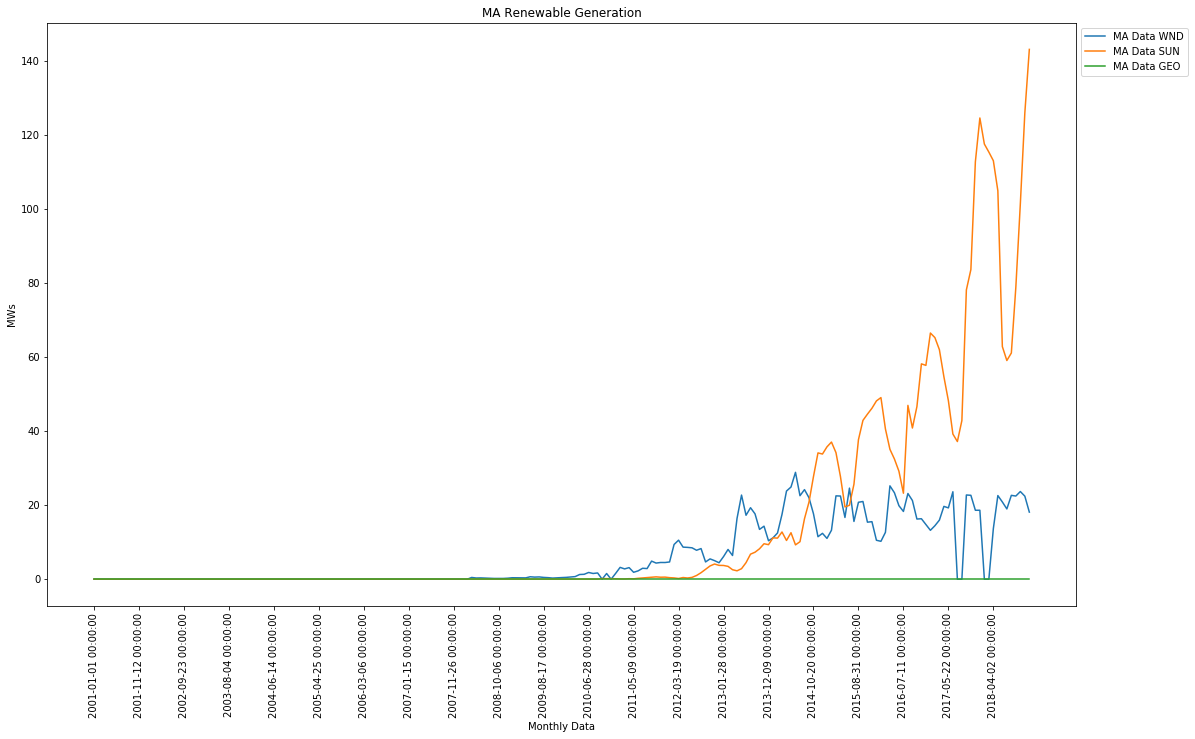

['WND', 'SUN', 'GEO']


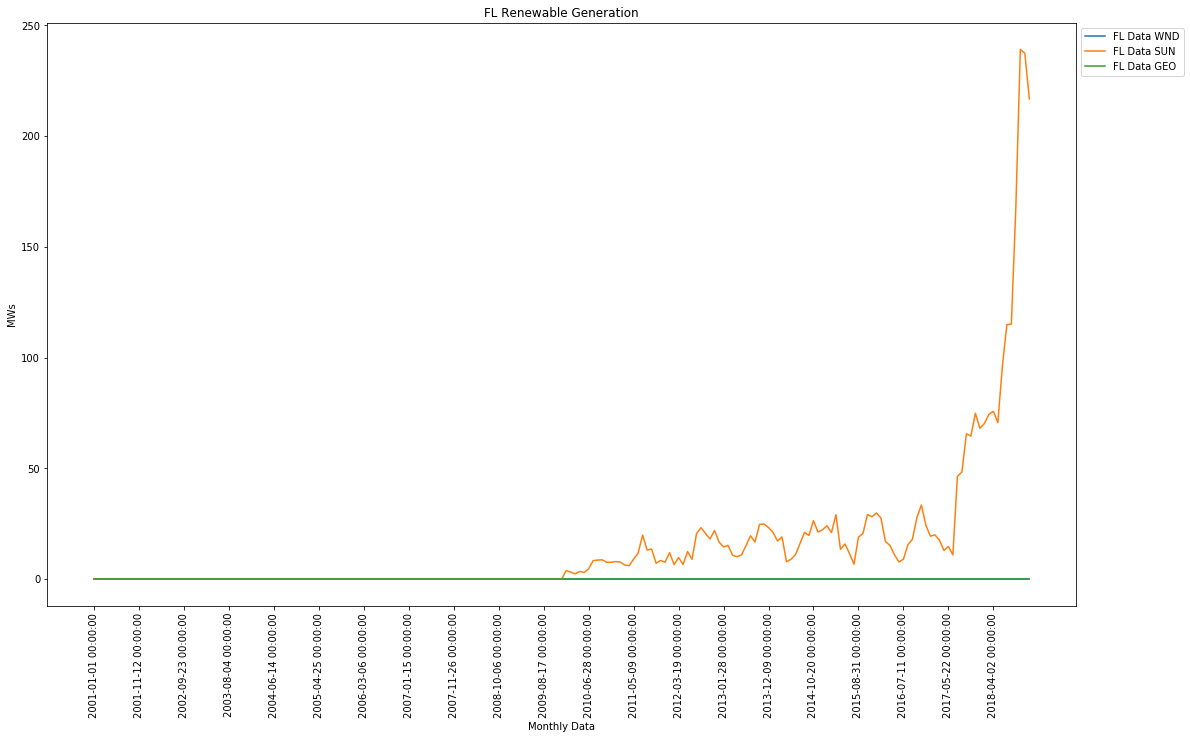

['WND', 'SUN', 'GEO']


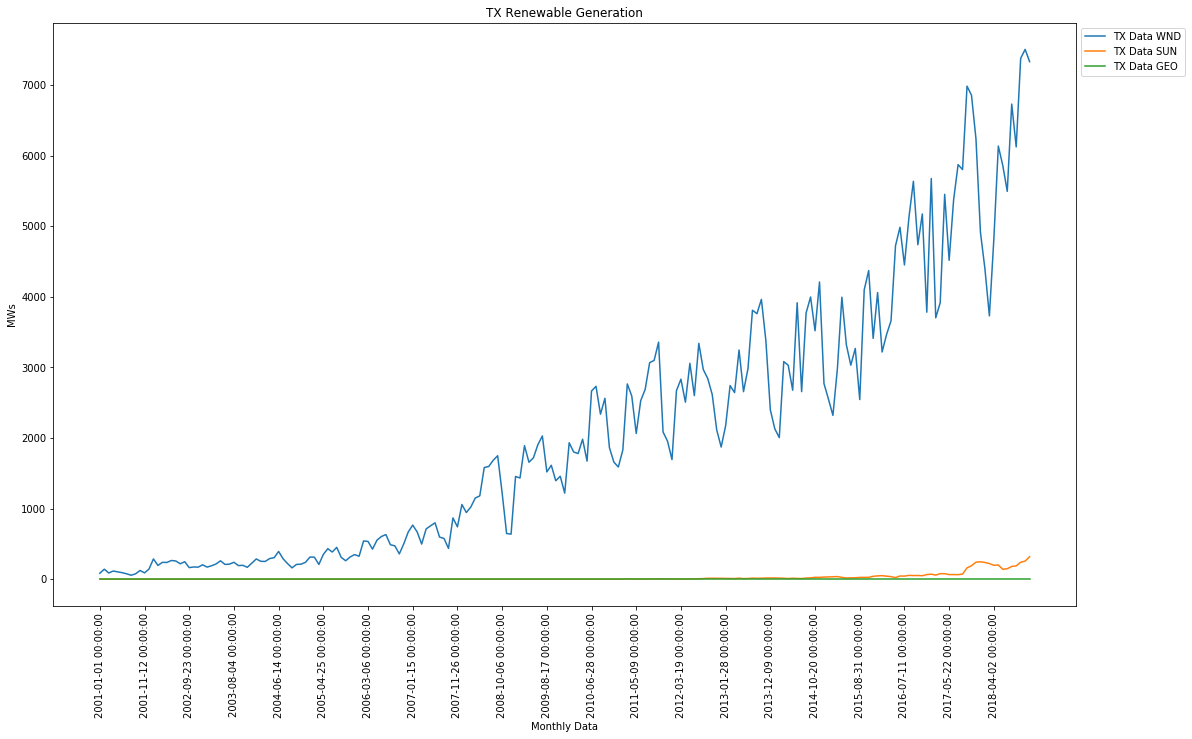

['WND', 'SUN', 'GEO']


In [127]:
fuels = ["WND", "SUN", "GEO"]
for state in states:
    plt.figure(figsize=(15,10))
    for fuel in fuels:
        plt.plot(df1[str(state) + " Date " + str(fuel)],df1[str(state) + " Data " + str(fuel)])
    plt.xticks(np.arange(0,208,10), np.arange(date(2001,1,1), date(2018,5,1), timedelta(weeks=45)).astype(date), rotation=90)
    plt.tight_layout()
    plt.legend(bbox_to_anchor =(1,1))
    plt.title(str(state) + " Renewable Generation")
    plt.ylabel("MWs")
    plt.xlabel("Monthly Data")
    
    plt.savefig(str(state) + "renewablegeneration.png", dpi=500, bbox_inches='tight')
    plt.show()
    print(fuels)

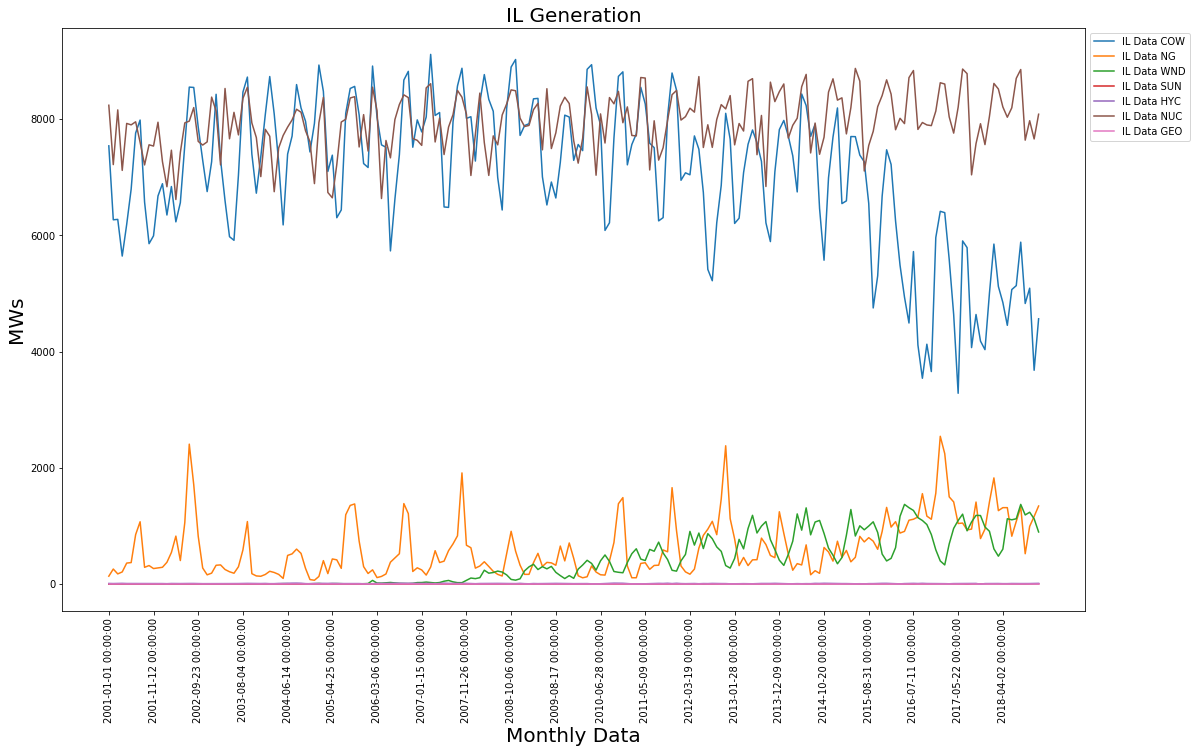

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


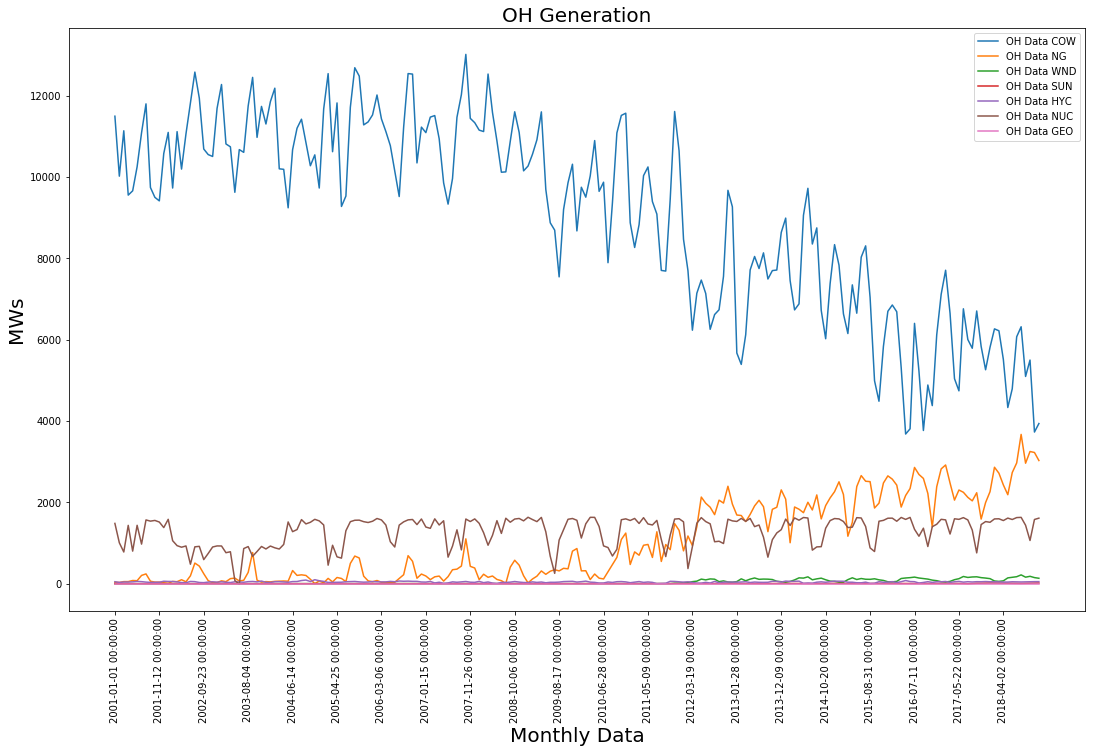

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


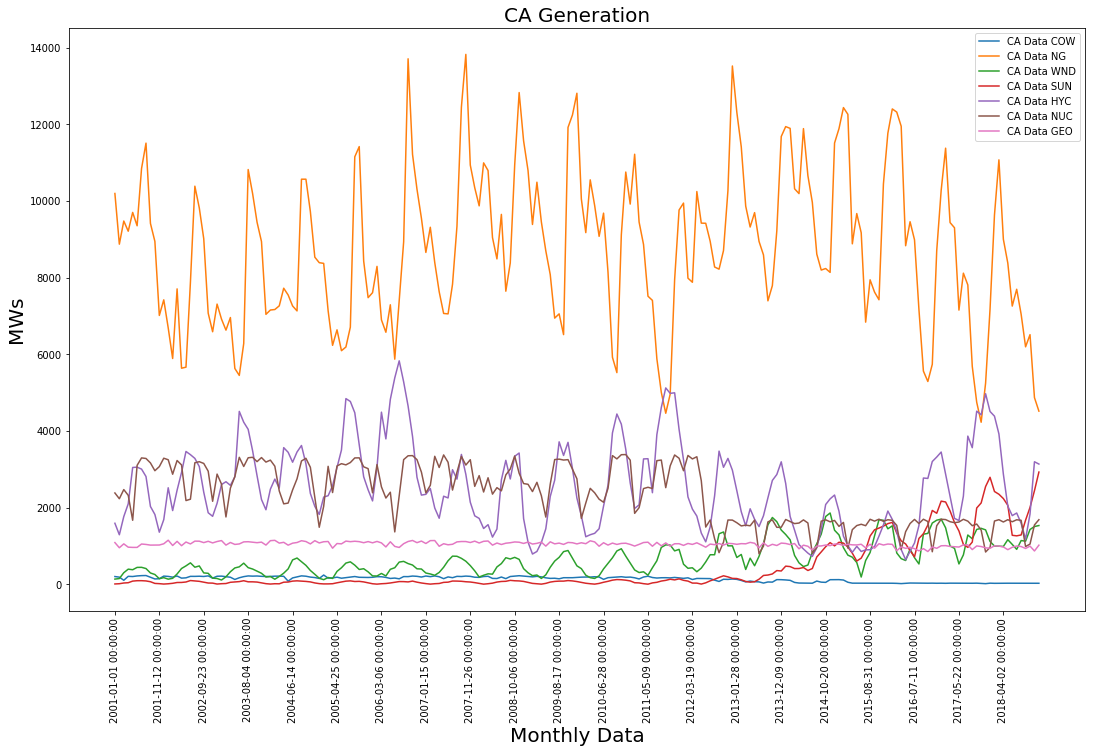

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


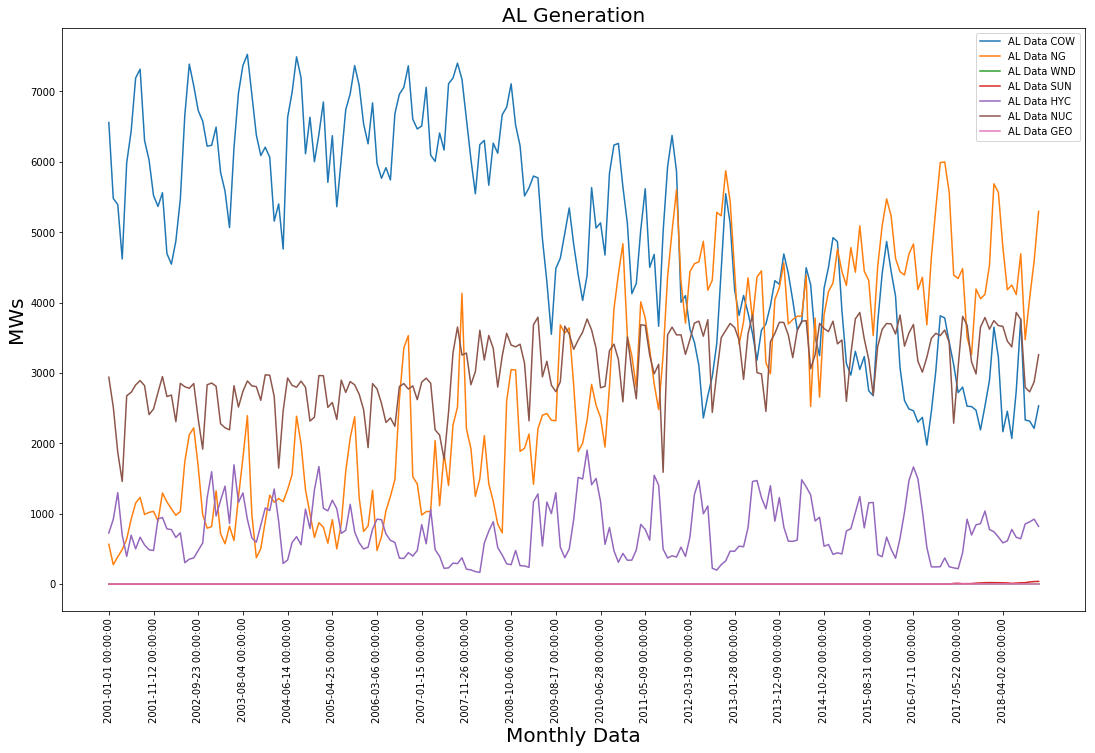

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


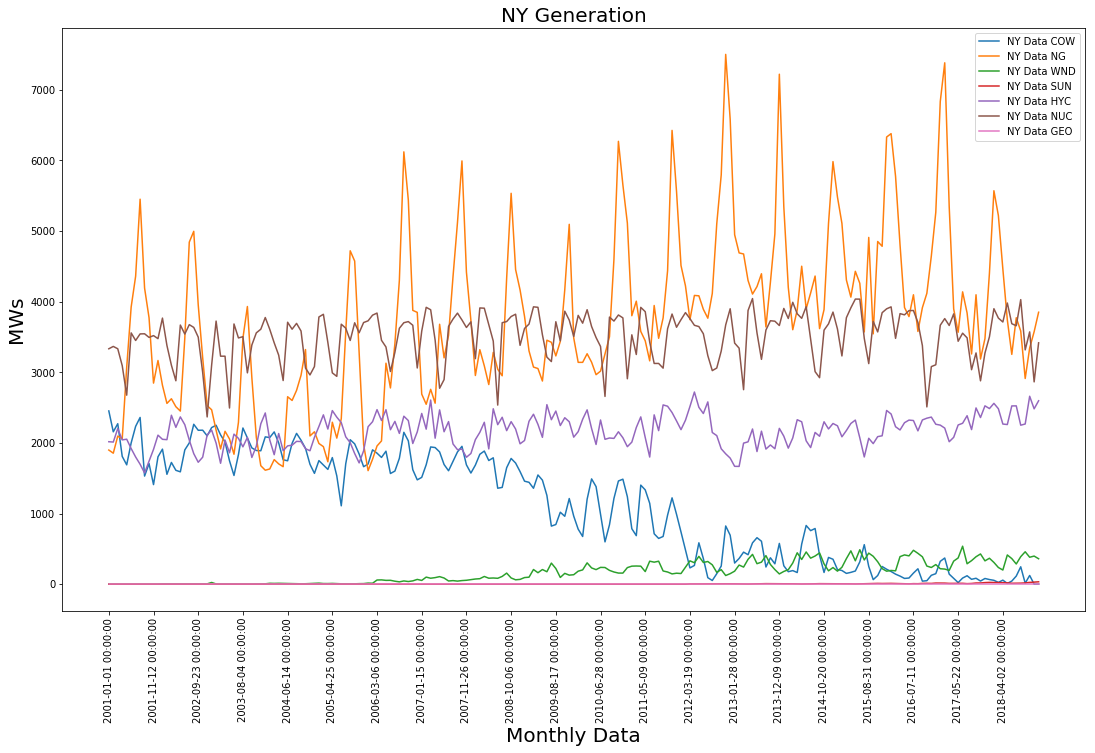

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


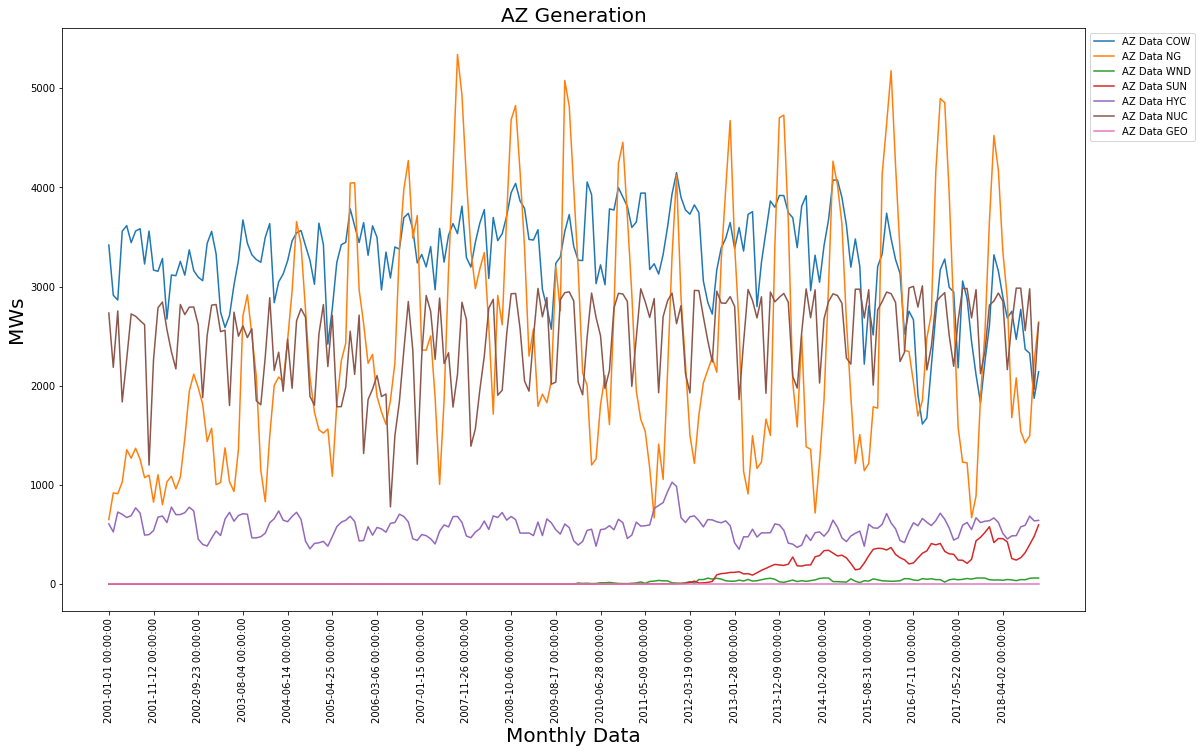

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


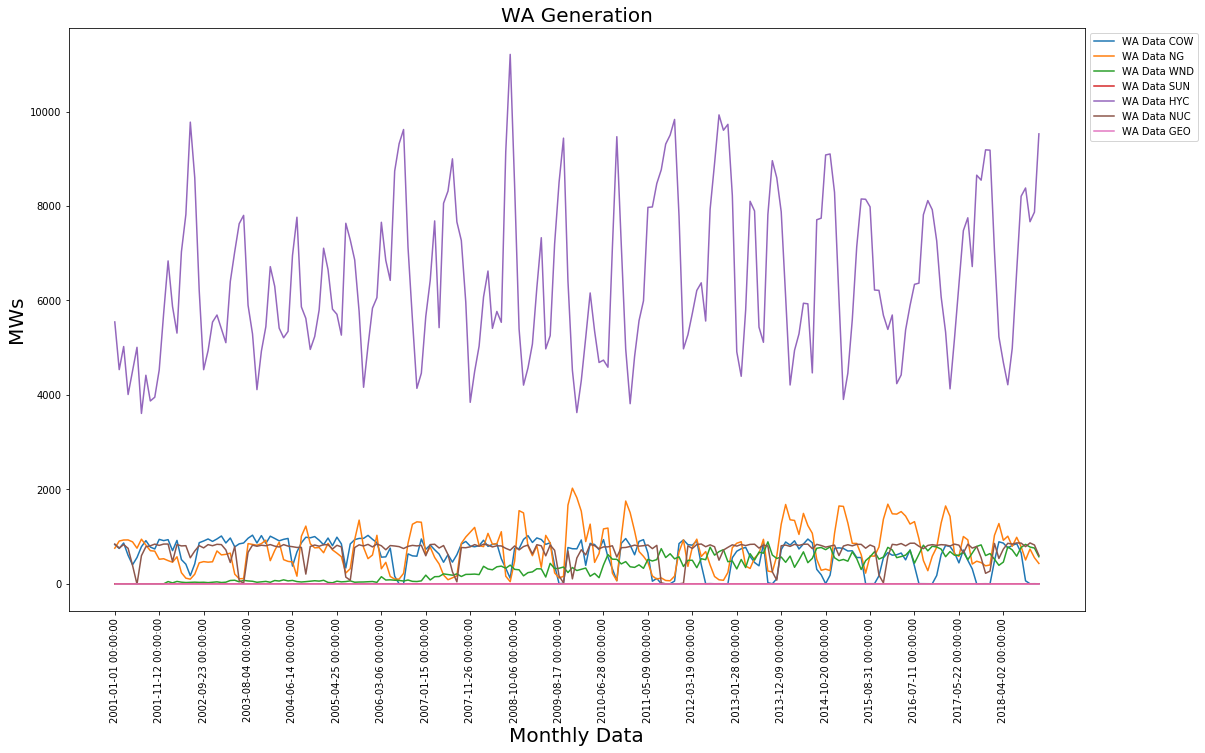

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


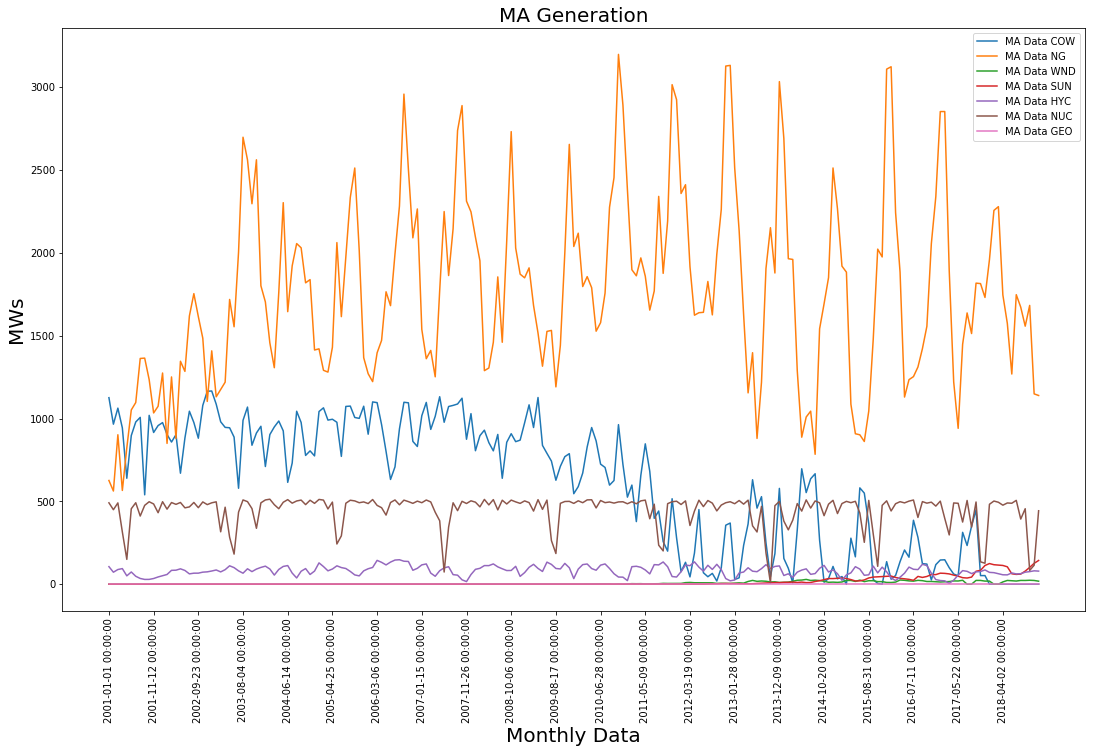

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


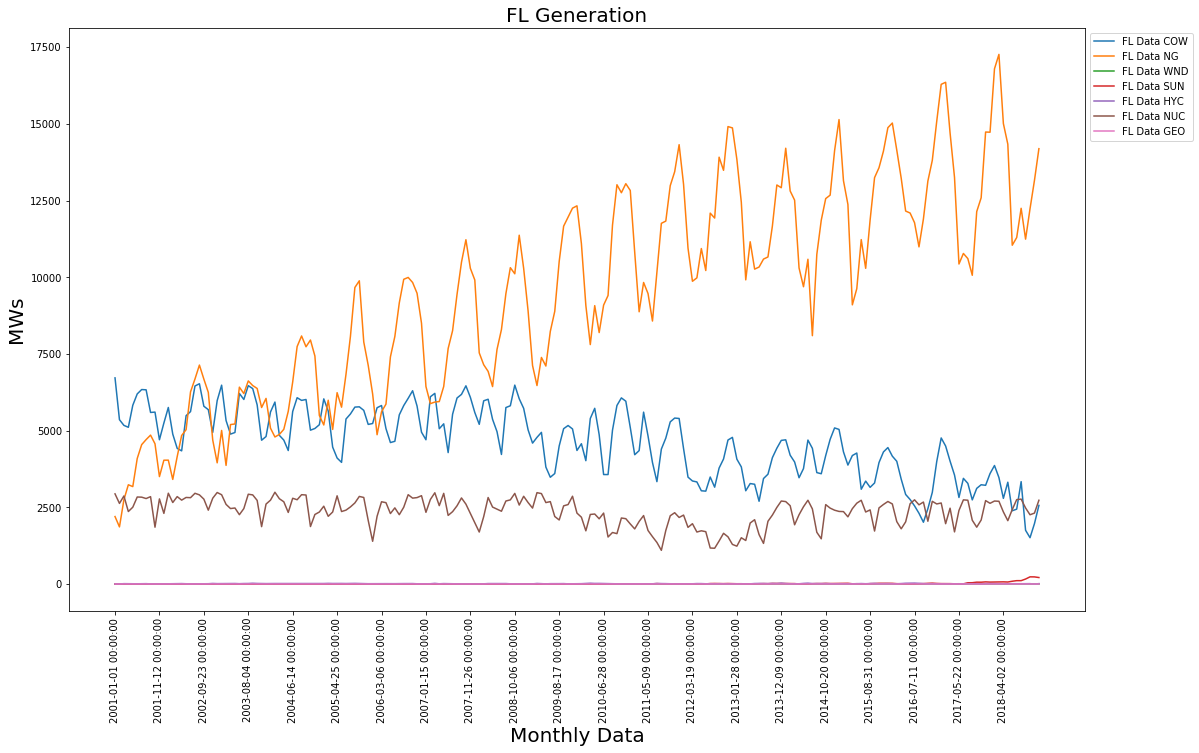

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


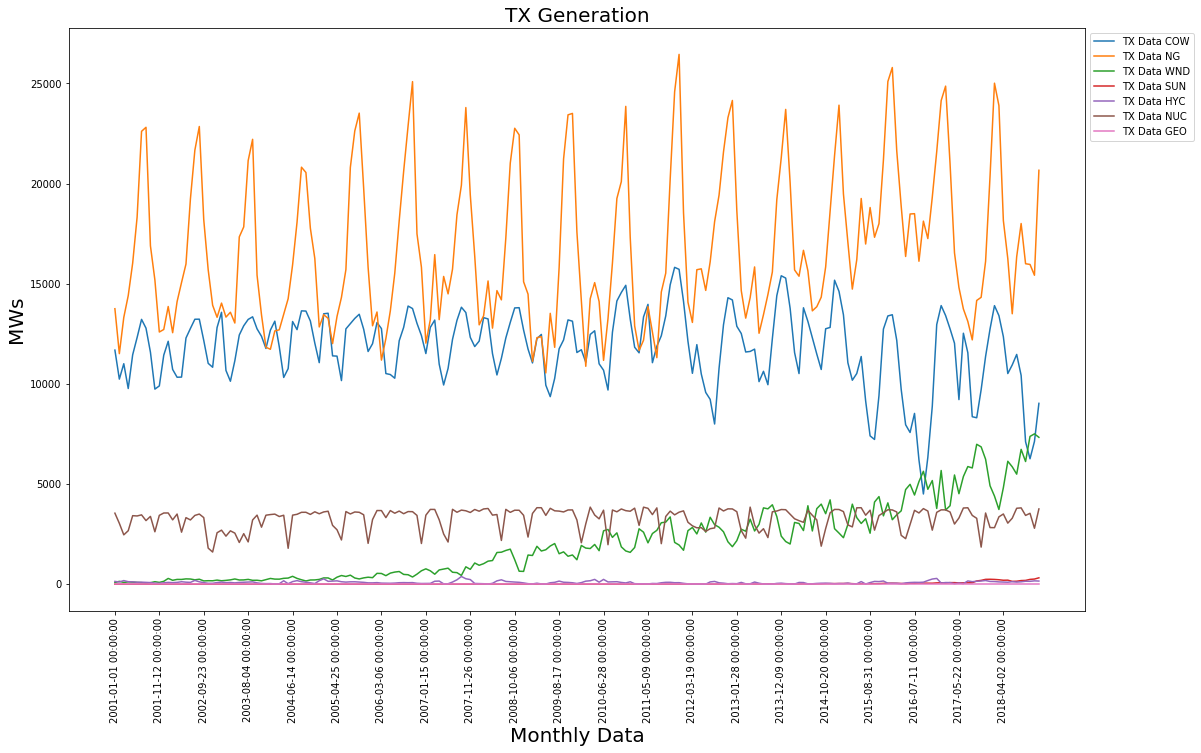

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


In [154]:
fuels = ["COW", "NG", "WND", "SUN", "HYC", "NUC", "GEO"]
for state in states:
    plt.figure(figsize=(15,10))
    for fuel in fuels:
        plt.plot(df1[str(state) + " Date " + str(fuel)],df1[str(state) + " Data " + str(fuel)])
    plt.xticks(np.arange(0,208,10), np.arange(date(2001,1,1), date(2018,5,1), timedelta(weeks=45)).astype(date), rotation=90)
    plt.tight_layout()
    plt.legend(bbox_to_anchor =(1,1))
    plt.title(str(state) + " Generation", fontsize=20)
    plt.ylabel("MWs", fontsize=20)
    plt.xlabel("Monthly Data", fontsize=20)
    plt.savefig(str(state) + "combinedgeneration.png", dpi=50, bbox_inches='tight')
    plt.show()
    print(fuels)

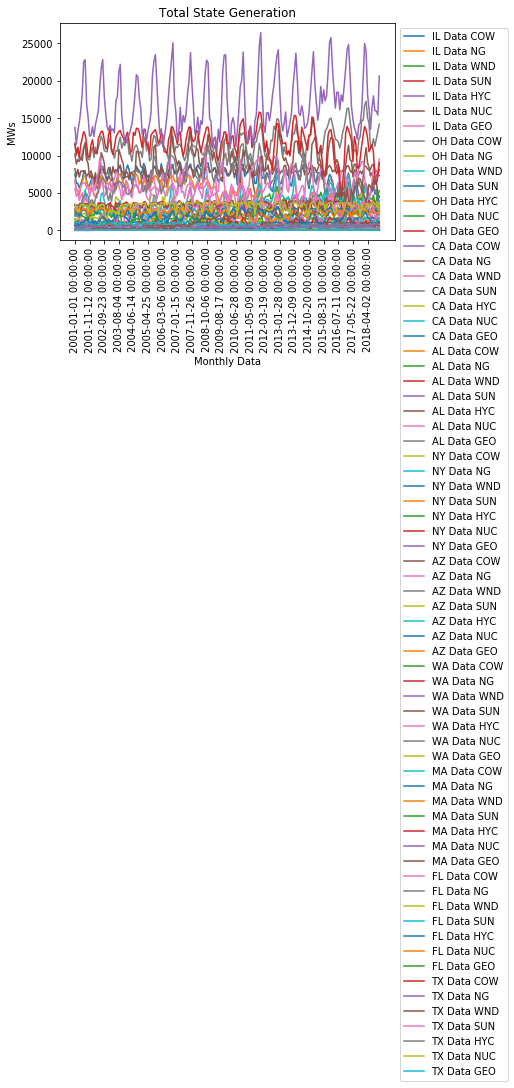

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


In [152]:
fuels = ["COW", "NG", "WND", "SUN", "HYC", "NUC", "GEO"]
for state in states:
    for fuel in fuels:
        plt.plot(df1[str(state) + " Date " + str(fuel)],df1[str(state) + " Data " + str(fuel)])
plt.legend(bbox_to_anchor =(1,1))
plt.title("Total State Generation")
plt.ylabel("MWs")
plt.xlabel("Monthly Data")
plt.xticks(np.arange(0,208,10), np.arange(date(2001,1,1), date(2018,5,1), timedelta(weeks=45)).astype(date), rotation=90)
plt.savefig("AllStatescombinedgeneration.png", dpi=500, bbox_inches='tight')
plt.show()
print(fuels)

In [11]:
#Total Generation for query
df2 = df1
states = ["IL", "OH", "CA", "AL", "NY", "AZ", "WA", "MA", "FL", "TX"]
fuels = ["COW", "NG", "WND", "SUN", "HYC", "NUC", "GEO"]

for fuel in fuels:
    df2[str(fuel) + " TOTAL"] = 0
    for state in states:
        df2[str(fuel) + " TOTAL"] = df2[str(fuel) + " TOTAL"] + df2[str(state) + " Data " + str(fuel)]

        df2["Date"] = df2["IL Date COW"]
df3 = df2[["COW TOTAL", "NG TOTAL", "WND TOTAL", "SUN TOTAL", "HYC TOTAL", "NUC TOTAL", "GEO TOTAL", "Date"]]

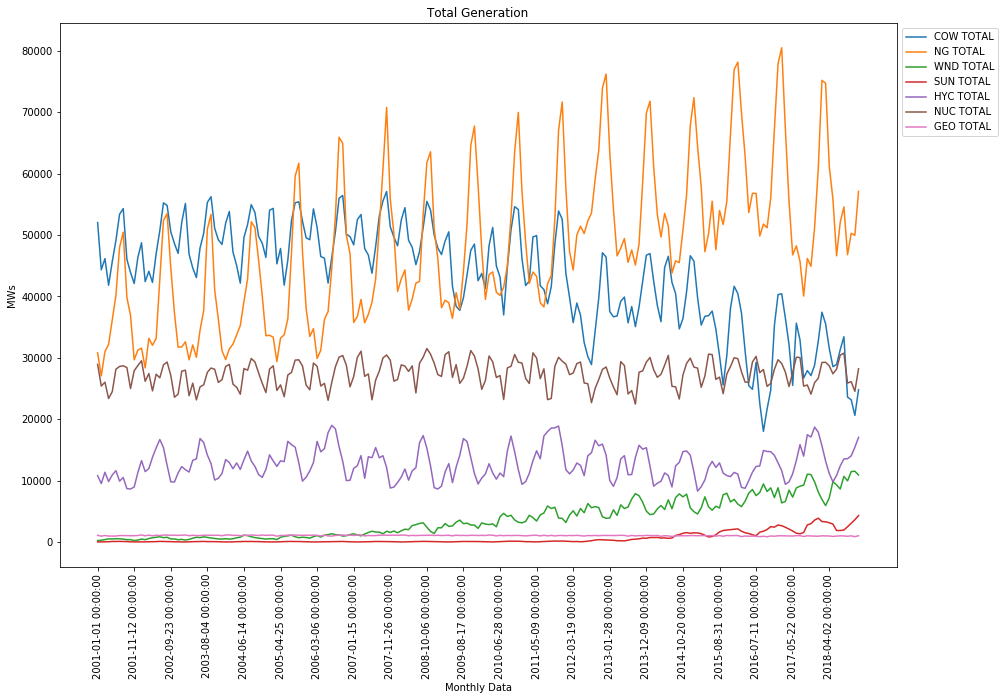

['COW', 'NG', 'WND', 'SUN', 'HYC', 'NUC', 'GEO']


In [155]:
fuels = ["COW", "NG", "WND", "SUN", "HYC", "NUC", "GEO"]
plt.figure(figsize=(15,10))
for fuel in fuels:
    plt.plot(df3["Date"],df3[str(fuel) + " TOTAL"])
plt.xticks(np.arange(0,208,10), np.arange(date(2001,1,1), date(2018,5,1), timedelta(weeks=45)).astype(date), rotation=90)

plt.legend(bbox_to_anchor =(1,1))    
plt.title("Total Generation")
plt.ylabel("MWs")
plt.xlabel("Monthly Data")
plt.savefig("TotalGen.png", dpi=50, bbox_inches='tight')
plt.show()
print(fuels)

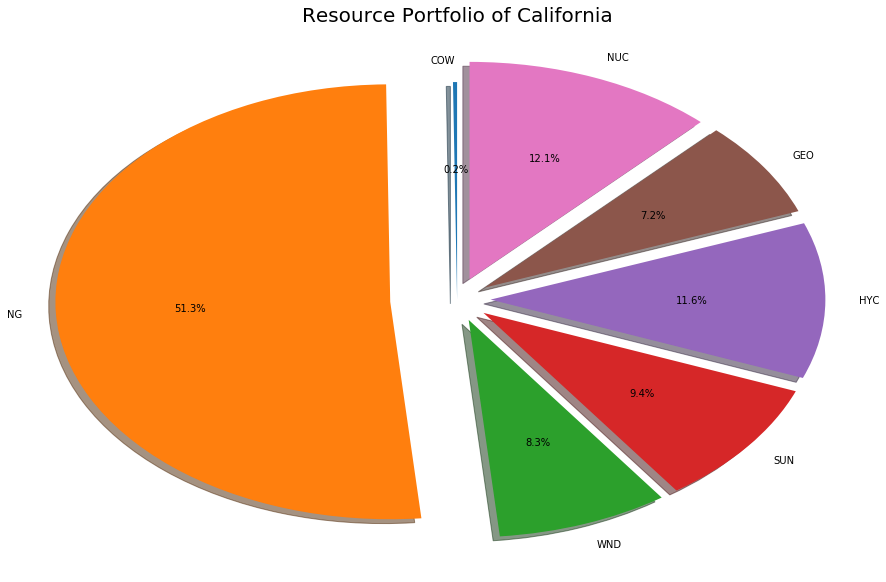

In [138]:
df_current = df1.loc[df1["IL Date COW"] == "201801"]
df_CA = df_current[["CA Data COW", "CA Data NG", "CA Data WND", "CA Data SUN", "CA Data HYC", "CA Data GEO", "CA Data NUC"]]
ca_list = []
ca_list.append(df_CA['CA Data COW'].values.tolist())
ca_list.append(df_CA['CA Data NG'].values.tolist())
ca_list.append(df_CA['CA Data WND'].values.tolist())
ca_list.append(df_CA['CA Data SUN'].values.tolist())
ca_list.append(df_CA['CA Data HYC'].values.tolist())
ca_list.append(df_CA['CA Data GEO'].values.tolist())
ca_list.append(df_CA['CA Data NUC'].values.tolist())

explode=(0, 0.20, .10, .10,.10,.10,.10)
plt.figure(figsize=(15,10))
plt.pie(ca_list, labels=["COW", "NG", "WND", "SUN", "HYC", "GEO", "NUC"], explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Resource Portfolio of California", fontsize=20)
plt.savefig("californiaPie.png")
plt.show()


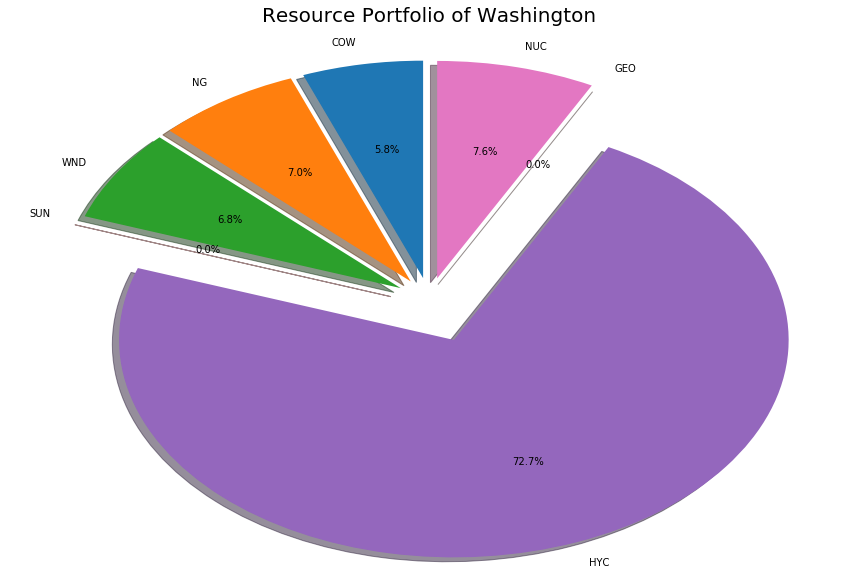

In [134]:
df_current = df1.loc[df1["IL Date COW"] == "201801"]
df_WA = df_current[["WA Data COW", "WA Data NG", "WA Data WND", "WA Data SUN", "WA Data HYC", "WA Data GEO", "WA Data NUC"]]
WA_list = []
WA_list.append(df_WA['WA Data COW'].values.tolist())
WA_list.append(df_WA['WA Data NG'].values.tolist())
WA_list.append(df_WA['WA Data WND'].values.tolist())
WA_list.append(df_WA['WA Data SUN'].values.tolist())
WA_list.append(df_WA['WA Data HYC'].values.tolist())
WA_list.append(df_WA['WA Data GEO'].values.tolist())
WA_list.append(df_WA['WA Data NUC'].values.tolist())

explode=(.10, 0.10, .10, .10,.20,.10,.10)
plt.figure(figsize=(15,10))
plt.pie(WA_list, labels=["COW", "NG", "WND", "SUN", "HYC", "GEO", "NUC"], explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Resource Portfolio of Washington", fontsize=20)
plt.savefig("washingtonPie.png")
plt.show()
